In [59]:
import pandas as pd
import numpy as np
import requests
import json
from matplotlib import pyplot as plt

omdb_key = 'afd4c6'

In [2]:
awards_file = "../the_oscar_award.csv"

award_df = pd.read_csv(awards_file)

In [3]:
award_df

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10390,2019,2020,92,WRITING (Original Screenplay),"Screenplay by Bong Joon Ho, Han Jin Won; Story...",Parasite,True
10391,2019,2020,92,JEAN HERSHOLT HUMANITARIAN AWARD,Geena Davis,NaN,True
10392,2019,2020,92,HONORARY AWARD,David Lynch,NaN,True
10393,2019,2020,92,HONORARY AWARD,Wes Studi,NaN,True


In [4]:
test = award_df[award_df['year_ceremony'] == 1930]

In [5]:
test

,year_film,year_ceremony,ceremony,category,name,film,winner
73,1929,1930,3,ACTOR,George Arliss,Disraeli,True
74,1929,1930,3,ACTOR,George Arliss,The Green Goddess,False
75,1929,1930,3,ACTOR,Wallace Beery,The Big House,False
76,1929,1930,3,ACTOR,Maurice Chevalier,The Big Pond,False
77,1929,1930,3,ACTOR,Ronald Colman,Bulldog Drummond,False
78,1929,1930,3,ACTOR,Lawrence Tibbett,The Rogue Song,False
79,1929,1930,3,ACTRESS,Nancy Carroll,The Devil's Holiday,False
80,1929,1930,3,ACTRESS,Ruth Chatterton,Sarah and Son,False
81,1929,1930,3,ACTRESS,Greta Garbo,Anna Christie,False
82,1929,1930,3,ACTRESS,Norma Shearer,The Divorcee,True


In [6]:
bestPicture = set(['BEST PICTURE','BEST MOTION PICTURE', 'OUTSTANDING MOTION PICTURE', 'OUTSTANDING PICTURE','OUTSTANDING PRODUCTION'])
test = [category in bestPicture for category in award_df.category]

In [47]:
movie_df = award_df[test & (award_df.winner == True)].sort_values('year_ceremony').reset_index(drop = True)

In [8]:
movie_df

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,OUTSTANDING PICTURE,Paramount Famous Lasky,Wings,True
1,1928,1929,2,OUTSTANDING PICTURE,Metro-Goldwyn-Mayer,The Broadway Melody,True
2,1929,1930,3,OUTSTANDING PRODUCTION,Universal,All Quiet on the Western Front,True
3,1930,1931,4,OUTSTANDING PRODUCTION,RKO Radio,Cimarron,True
4,1931,1932,5,OUTSTANDING PRODUCTION,Metro-Goldwyn-Mayer,Grand Hotel,True
...,...,...,...,...,...,...,...
87,2015,2016,88,BEST PICTURE,"Michael Sugar, Steve Golin, Nicole Rocklin and...",Spotlight,True
88,2016,2017,89,BEST PICTURE,"Adele Romanski, Dede Gardner and Jeremy Kleine...",Moonlight,True
89,2017,2018,90,BEST PICTURE,"Guillermo del Toro and J. Miles Dale, Producers",The Shape of Water,True
90,2018,2019,91,BEST PICTURE,"Jim Burke, Charles B. Wessler, Brian Currie, P...",Green Book,True


In [52]:
def getInfo(name, year = ''):
    url = "http://www.omdbapi.com/?t=" + name
    if year != "":
        url += "&y=" + str(year)
        
    api_key = "&apikey=" + omdb_key

    try:
        response = requests.get(url + name + api_key).json()
    except:
        print(f"did not find{url}")
    return response

def getBoxoffice(x):
    boxoffice = x['BoxOffice']
    boxoffice = boxoffice.replace(',', '')
    boxoffice = boxoffice.replace('$', '')
    try:
        value = int(boxoffice)
    except: 
        value = 0
        
    return value

In [50]:
result = [getBoxoffice(getInfo(x, y)) for x, y in zip(movie_df['film'], movie_df['year_film'])]

In [53]:
movie_df['BoxOffice'] = result

In [54]:
movie_df

,year_film,year_ceremony,ceremony,category,name,film,winner,BoxOffice
0,1927,1928,1,OUTSTANDING PICTURE,Paramount Famous Lasky,Wings,True,0
1,1928,1929,2,OUTSTANDING PICTURE,Metro-Goldwyn-Mayer,The Broadway Melody,True,0
2,1929,1930,3,OUTSTANDING PRODUCTION,Universal,All Quiet on the Western Front,True,0
3,1930,1931,4,OUTSTANDING PRODUCTION,RKO Radio,Cimarron,True,0
4,1931,1932,5,OUTSTANDING PRODUCTION,Metro-Goldwyn-Mayer,Grand Hotel,True,0
...,...,...,...,...,...,...,...,...
87,2015,2016,88,BEST PICTURE,"Michael Sugar, Steve Golin, Nicole Rocklin and...",Spotlight,True,45055776
88,2016,2017,89,BEST PICTURE,"Adele Romanski, Dede Gardner and Jeremy Kleine...",Moonlight,True,27854932
89,2017,2018,90,BEST PICTURE,"Guillermo del Toro and J. Miles Dale, Producers",The Shape of Water,True,63859435
90,2018,2019,91,BEST PICTURE,"Jim Burke, Charles B. Wessler, Brian Currie, P...",Green Book,True,85080171


In [56]:
box_df = movie_df[movie_df['BoxOffice'] > 0]

In [57]:
box_df

,year_film,year_ceremony,ceremony,category,name,film,winner,BoxOffice
11,1939,1940,12,OUTSTANDING PRODUCTION,Selznick International Pictures,Gone with the Wind,True,200852579
15,1943,1944,16,OUTSTANDING MOTION PICTURE,Warner Bros.,Casablanca,True,4108411
16,1944,1945,17,BEST MOTION PICTURE,Paramount,Going My Way,True,16300000
18,1946,1947,19,BEST MOTION PICTURE,Samuel Goldwyn Productions,The Best Years of Our Lives,True,23650000
20,1948,1949,21,BEST MOTION PICTURE,J. Arthur Rank-Two Cities Films,Hamlet,True,4708156
...,...,...,...,...,...,...,...,...
87,2015,2016,88,BEST PICTURE,"Michael Sugar, Steve Golin, Nicole Rocklin and...",Spotlight,True,45055776
88,2016,2017,89,BEST PICTURE,"Adele Romanski, Dede Gardner and Jeremy Kleine...",Moonlight,True,27854932
89,2017,2018,90,BEST PICTURE,"Guillermo del Toro and J. Miles Dale, Producers",The Shape of Water,True,63859435
90,2018,2019,91,BEST PICTURE,"Jim Burke, Charles B. Wessler, Brian Currie, P...",Green Book,True,85080171


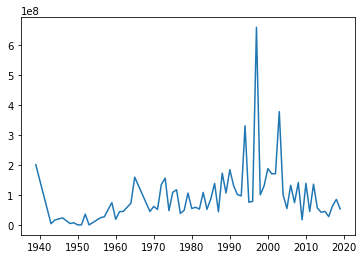

In [60]:
plt.plot(box_df.year_film, box_df.BoxOffice)

In [65]:
top_box = box_df.sort_values('BoxOffice', ascending = False)
top_box.head(10)

,year_film,year_ceremony,ceremony,category,name,film,winner,BoxOffice
69,1997,1998,70,BEST PICTURE,"James Cameron and Jon Landau, Producers",Titanic,True,659363944
75,2003,2004,76,BEST PICTURE,"Barrie M. Osborne, Peter Jackson and Fran Wals...",The Lord of the Rings: The Return of the King,True,377845905
66,1994,1995,67,BEST PICTURE,"Wendy Finerman, Steve Tisch and Steve Starkey,...",Forrest Gump,True,330455270
11,1939,1940,12,OUTSTANDING PRODUCTION,Selznick International Pictures,Gone with the Wind,True,200852579
72,2000,2001,73,BEST PICTURE,"Douglas Wick, David Franzoni and Branko Lustig...",Gladiator,True,187705427
62,1990,1991,63,BEST PICTURE,"Jim Wilson and Kevin Costner, Producers",Dances With Wolves,True,184208848
60,1988,1989,61,BEST PICTURE,"Mark Johnson, Producer",Rain Man,True,172825435
73,2001,2002,74,BEST PICTURE,"Brian Grazer and Ron Howard, Producers",A Beautiful Mind,True,170742341
74,2002,2003,75,BEST PICTURE,"Martin Richards, Producer",Chicago,True,170687518
37,1965,1966,38,BEST PICTURE,"Robert Wise, Producer",The Sound of Music,True,159287539


In [80]:
x = getInfo("*hobbit*", "197*")

In [81]:
x

{'Title': 'The Hobbit: An Unexpected Journey',
 'Year': '2012',
 'Rated': 'PG-13',
 'Released': '14 Dec 2012',
 'Runtime': '169 min',
 'Genre': 'Adventure, Fantasy',
 'Director': 'Peter Jackson',
 'Writer': 'Fran Walsh (screenplay), Philippa Boyens (screenplay), Peter Jackson (screenplay), Guillermo del Toro (screenplay), J.R.R. Tolkien (novel)',
 'Actors': 'Ian McKellen, Martin Freeman, Richard Armitage, Ken Stott',
 'Plot': 'A reluctant Hobbit, Bilbo Baggins, sets out to the Lonely Mountain with a spirited group of dwarves to reclaim their mountain home, and the gold within it from the dragon Smaug.',
 'Language': 'English',
 'Country': 'New Zealand, USA',
 'Awards': 'Nominated for 3 Oscars. Another 12 wins & 72 nominations.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMTcwNTE4MTUxMl5BMl5BanBnXkFtZTcwMDIyODM4OA@@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.8/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '64%'},
  {'Source': 'Metacritic', '